In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv('file:///D:/Data%20Science%20&%20AI/Praxis%20Data%20Science/Projects%20Praxis/Machine%20Learning%20Project/laptop-price-predictor-regression-project-main/laptop-price-predictor-regression-project-main/laptop_data.csv')
print('No of instances before removing duplicates :',df.shape)
df.drop_duplicates
print('No of instances after removing duplicates :',df.shape)
df.head()

No of instances before removing duplicates : (1303, 12)
No of instances after removing duplicates : (1303, 12)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Defining Business Problems

# solving the laptop price prediction problem can help address business challenges-


# Pricing Optimization: By accurately predicting laptop prices, businesses can optimize their pricing strategies.

# Market Positioning: Price prediction can assist businesses in positioning their laptops in the market.

# Competitive Analysis: Price prediction can help businesses gain a competitive advantage by understanding the pricing strategies of their competitors.

In [160]:
#1.Q-What should be the optimal price for a laptop?
#2.Q-What factors influence the pricing of brand laptops?:?
#3-Q-How can accurate laptop price predictions benefit our brand?:

# Identify Features Available In This Dataset

In [161]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

# Exploratory Data Analysis

In [162]:
df.describe(include='number')

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [163]:
df.describe(exclude='number')

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


### Remove useless column

In [164]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [165]:
# Removing strings from continous columns
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [166]:
#Changing Datatype
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

# Univariate Analysis

<Axes: >

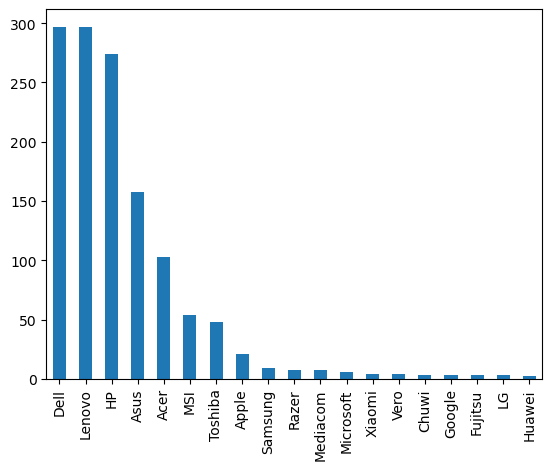

In [167]:
df['Company'].value_counts().plot(kind='bar')

<Axes: >

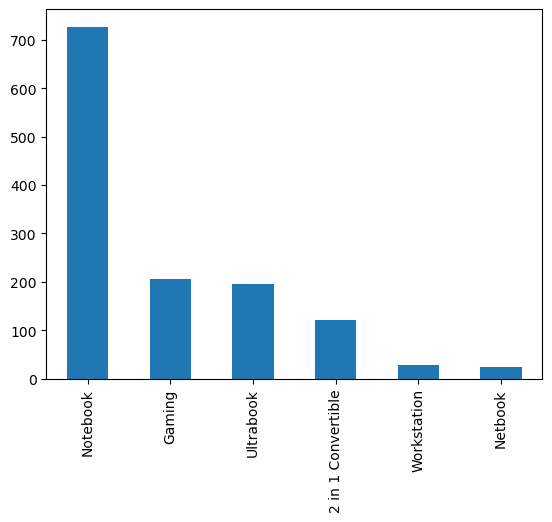

In [168]:
df['TypeName'].value_counts().plot(kind='bar')

<Axes: >

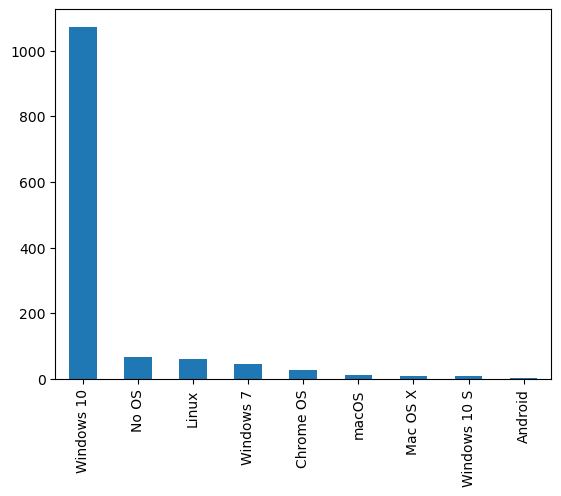

In [169]:
df['OpSys'].value_counts().plot(kind='bar')

<Axes: >

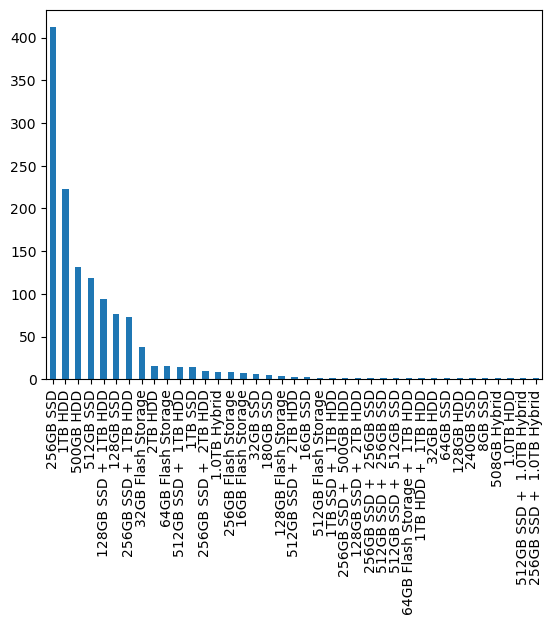

In [170]:
df['Memory'].value_counts().plot(kind='bar')

# Bivariate Analysis

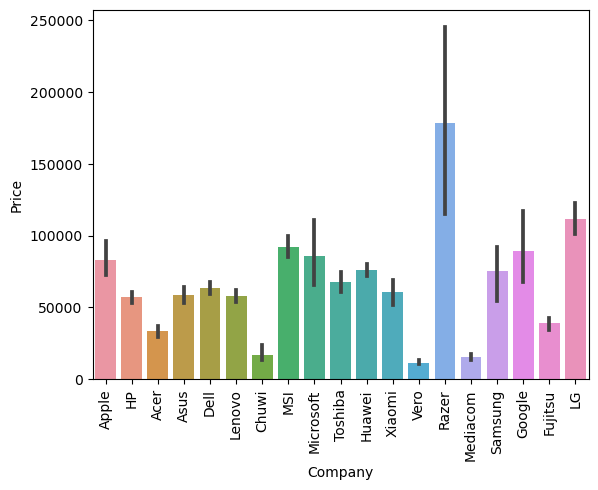

In [171]:
import seaborn as sns
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Q.Which Type of laptop model is costliest

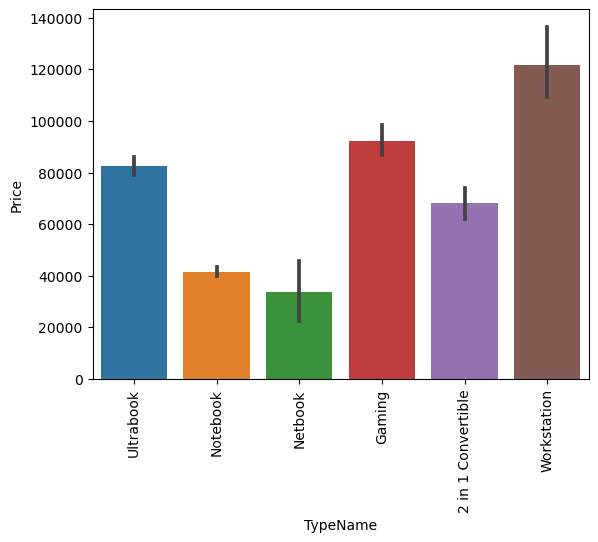

In [172]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

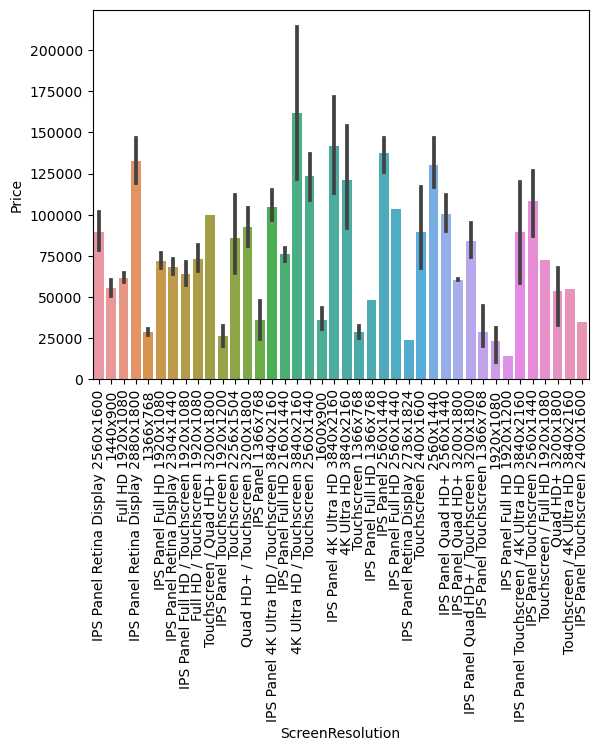

In [173]:
sns.barplot(x=df['ScreenResolution'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [174]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen', ylabel='Price'>

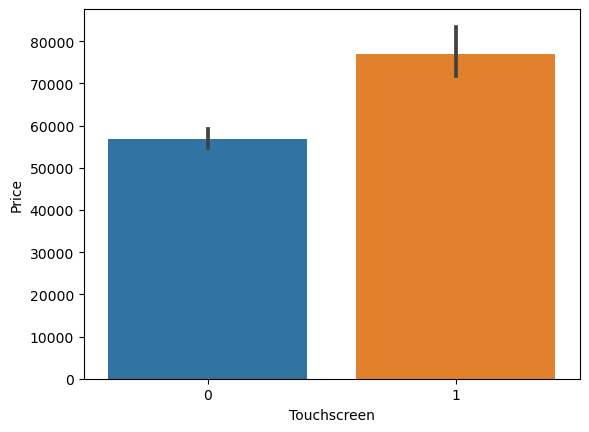

In [175]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [176]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

## Q.Does Display Quality matter to influence the price?

<Axes: xlabel='Ips', ylabel='Price'>

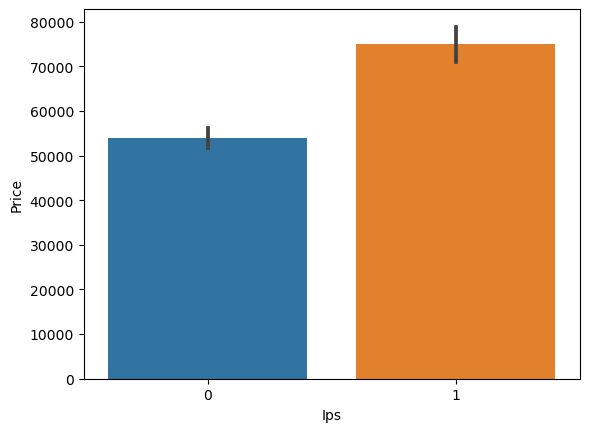

In [177]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [178]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [179]:
##Removing strings
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [180]:
#Converting datatype after removing string
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [181]:
#create new variable
df['pixel_per_inch'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [182]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [183]:
##Removing strings
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [184]:
def fetch_processor(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return text
    elif text.startswith('Intel'):
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'


In [185]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

## Q.Which Cpu brand is costly

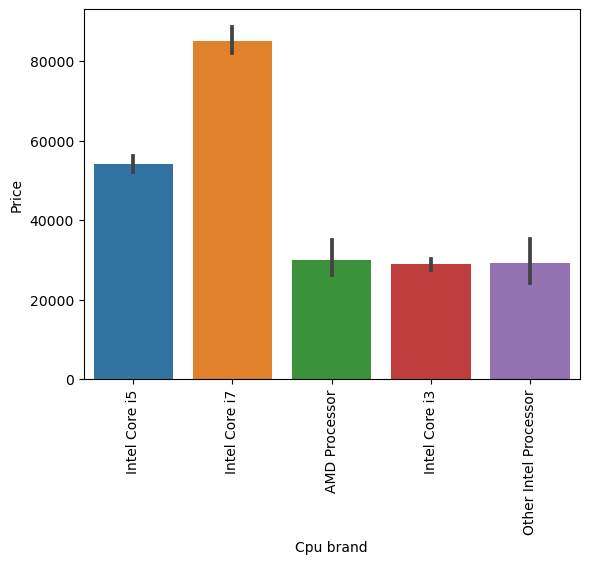

In [186]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [187]:
#Costilest cpu is i7

In [188]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

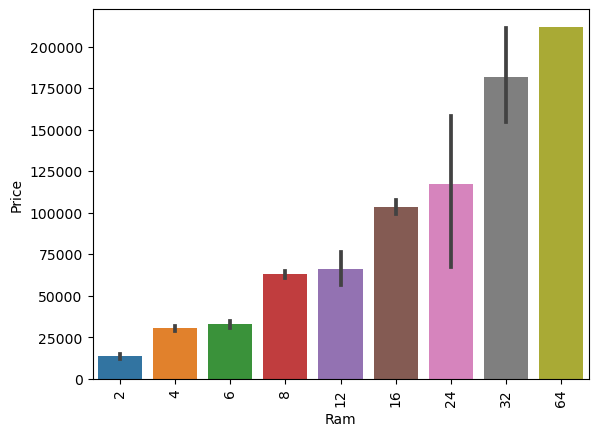

In [189]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [190]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

In [191]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["second"]= new[1]
df["second"]=df["second"].str.strip()

In [192]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [193]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)

The default value of regex will change from True to False in a future version.


In [194]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [195]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)
df['second'] = df['second'].str.replace(r'\D', '')
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

The default value of regex will change from True to False in a future version.
The default value of regex will change from True to False in a future version.


In [196]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [197]:
df.drop(columns=['Memory'],inplace=True)

In [198]:
#df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [199]:
#All widnows in windows category and mac in one category rest is others
def cat_os(inp):
    os_mapping = {
        'Windows 10': 'Windows',
        'Windows 7': 'Windows',
        'Windows 10 S': 'Windows',
        'macOS': 'Mac',
        'Mac OS X': 'Mac'
    }
    return os_mapping.get(inp, 'Others/No OS/Linux')

In [200]:
df['os'] = df['OpSys'].apply(cat_os)

In [201]:
df.drop(columns=['OpSys'],inplace=True)

## Q.Which os laptops are most costly

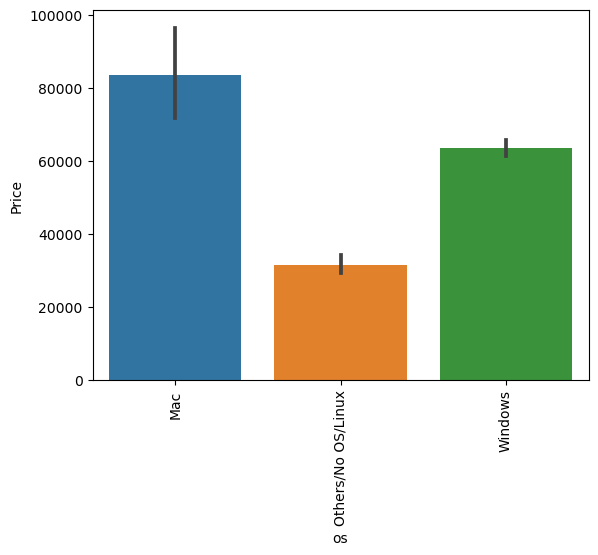

In [202]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [203]:
df.dtypes

Company            object
TypeName           object
Inches            float64
Ram                 int32
Gpu                object
Weight            float32
Price             float64
Touchscreen         int64
Ips                 int64
X_res               int32
Y_res               int32
pixel_per_inch    float64
Cpu brand          object
os                 object
dtype: object

In [204]:
cont_col1=list(df[df.dtypes[df.dtypes=='int32'].index].columns)
cont_col2=list(df[df.dtypes[df.dtypes=='float64'].index].columns)
cont_col3=list(df[df.dtypes[df.dtypes=='int64'].index].columns)
cont_col4=list(df[df.dtypes[df.dtypes=='float32'].index].columns)
all_cont=cont_col1+cont_col2+cont_col3+cont_col4

In [205]:
all_cont

['Ram',
 'X_res',
 'Y_res',
 'Inches',
 'Price',
 'pixel_per_inch',
 'Touchscreen',
 'Ips',
 'Weight']



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

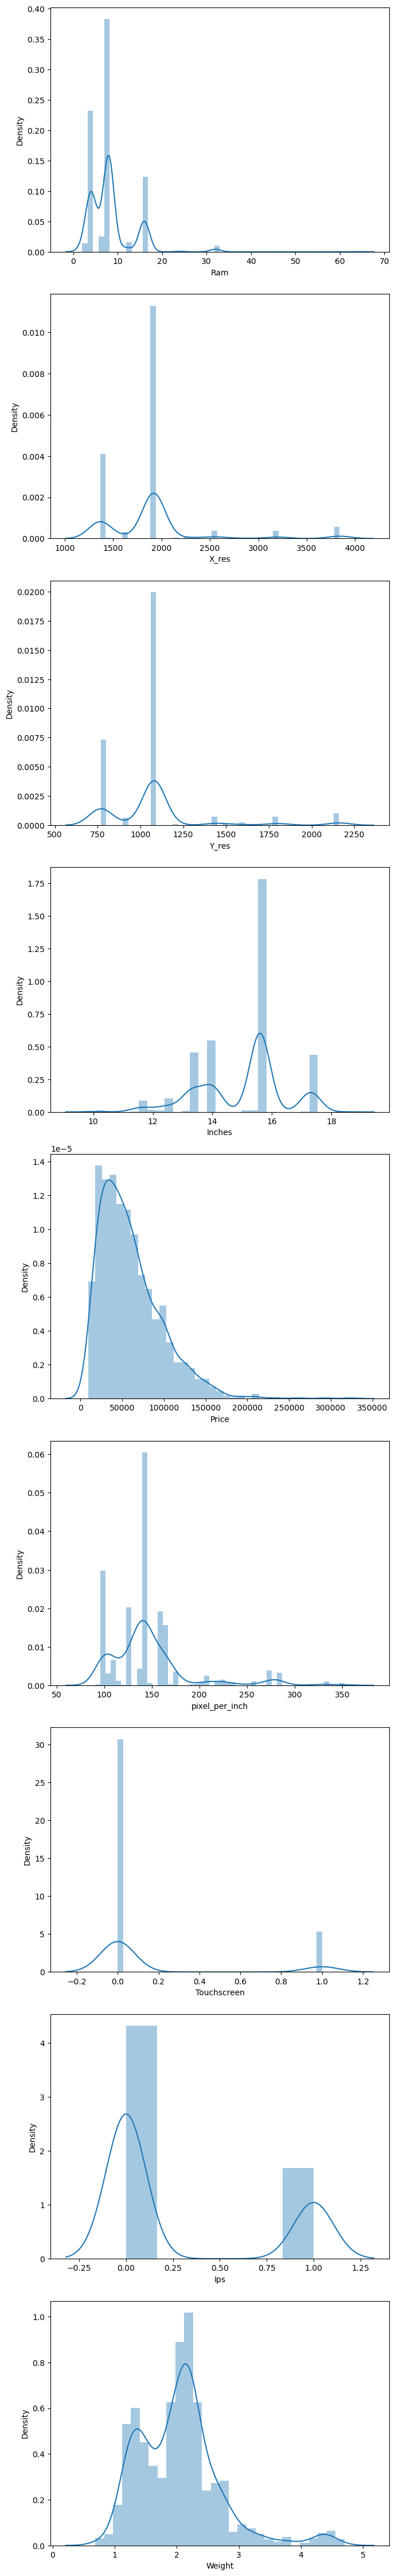

In [206]:
fig, axes = plt.subplots(len(all_cont), 1, figsize=(7, 5*len(all_cont)))

for i, col in enumerate(all_cont):
    sns.distplot(df[col], ax=axes[i])

plt.tight_layout()
plt.show()

# Checking Missing values

In [207]:
df.isnull().sum()

Company           0
TypeName          0
Inches            0
Ram               0
Gpu               0
Weight            0
Price             0
Touchscreen       0
Ips               0
X_res             0
Y_res             0
pixel_per_inch    0
Cpu brand         0
os                0
dtype: int64

In [208]:
#nothing found

# Outlier Checking and Treatment

In [209]:
all_cont

['Ram',
 'X_res',
 'Y_res',
 'Inches',
 'Price',
 'pixel_per_inch',
 'Touchscreen',
 'Ips',
 'Weight']

<Axes: >

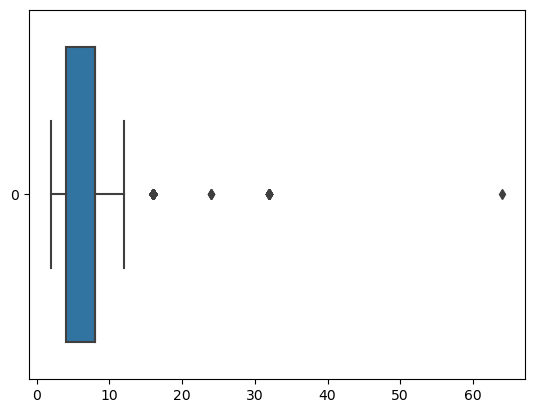

In [210]:
sns.boxplot(data=df['Ram'],orient='hue')

<Axes: >

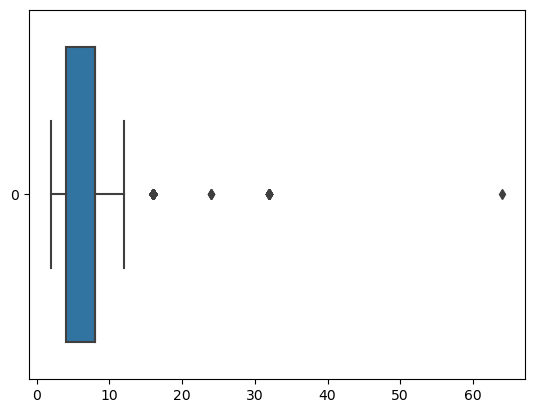

In [211]:
sns.boxplot(data=df['Ram'],orient='hue')

In [212]:
def outlier_findings(inpdata):
    quantile1, quantile3= np.percentile(inpdata,[25,75])
    print('Quartile 1 :',quantile1,'Quartile 3 :',quantile3)
    iqr_value=quantile3-quantile1
    
    print("Inter Quartile Range :",iqr_value)
    lower_bound_val = quantile1 -(1.5 * iqr_value) 
    upper_bound_val = quantile3 +(1.5 * iqr_value) 
    
    print("Min Whisker :",lower_bound_val,"Max Whiker :",upper_bound_val)
    lower_outliers = np.where(inpdata < lower_bound_val)
    upper_outliers = np.where(inpdata > upper_bound_val)
    
    print("Number of values below the lower bound:", len(lower_outliers[0]))
    print("Number of values above the upper bound:", len(upper_outliers[0]))

In [213]:
outlier_findings(inpdata=df['Ram'])

Quartile 1 : 4.0 Quartile 3 : 8.0
Inter Quartile Range : 4.0
Min Whisker : -2.0 Max Whiker : 14.0
Number of values below the lower bound: 0
Number of values above the upper bound: 221


In [214]:
outlier_findings(inpdata=df['Inches'])

Quartile 1 : 14.0 Quartile 3 : 15.6
Inter Quartile Range : 1.5999999999999996
Min Whisker : 11.600000000000001 Max Whiker : 18.0
Number of values below the lower bound: 38
Number of values above the upper bound: 1


In [215]:
outlier_findings(inpdata=df['Weight'])

Quartile 1 : 1.5 Quartile 3 : 2.299999952316284
Inter Quartile Range : 0.7999999523162842
Min Whisker : 0.30000007152557373 Max Whiker : 3.4999998807907104
Number of values below the lower bound: 0
Number of values above the upper bound: 46


### Treating outliers with winsorization technique

In [216]:
for i in all_cont:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[i] = np.where(df[i] > upper_bound, upper_bound,np.where(df[i] < lower_bound,lower_bound,df[i]))

In [217]:
outlier_findings(inpdata=df['Ram'])

Quartile 1 : 4.0 Quartile 3 : 8.0
Inter Quartile Range : 4.0
Min Whisker : -2.0 Max Whiker : 14.0
Number of values below the lower bound: 0
Number of values above the upper bound: 0


In [218]:
#df.columns

In [219]:
# df['Weight']=np.sqrt(df['Weight'])
# df['Ips']=np.sqrt(df['Ips'])

# Checking Correlation

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<function matplotlib.pyplot.show(close=None, block=None)>

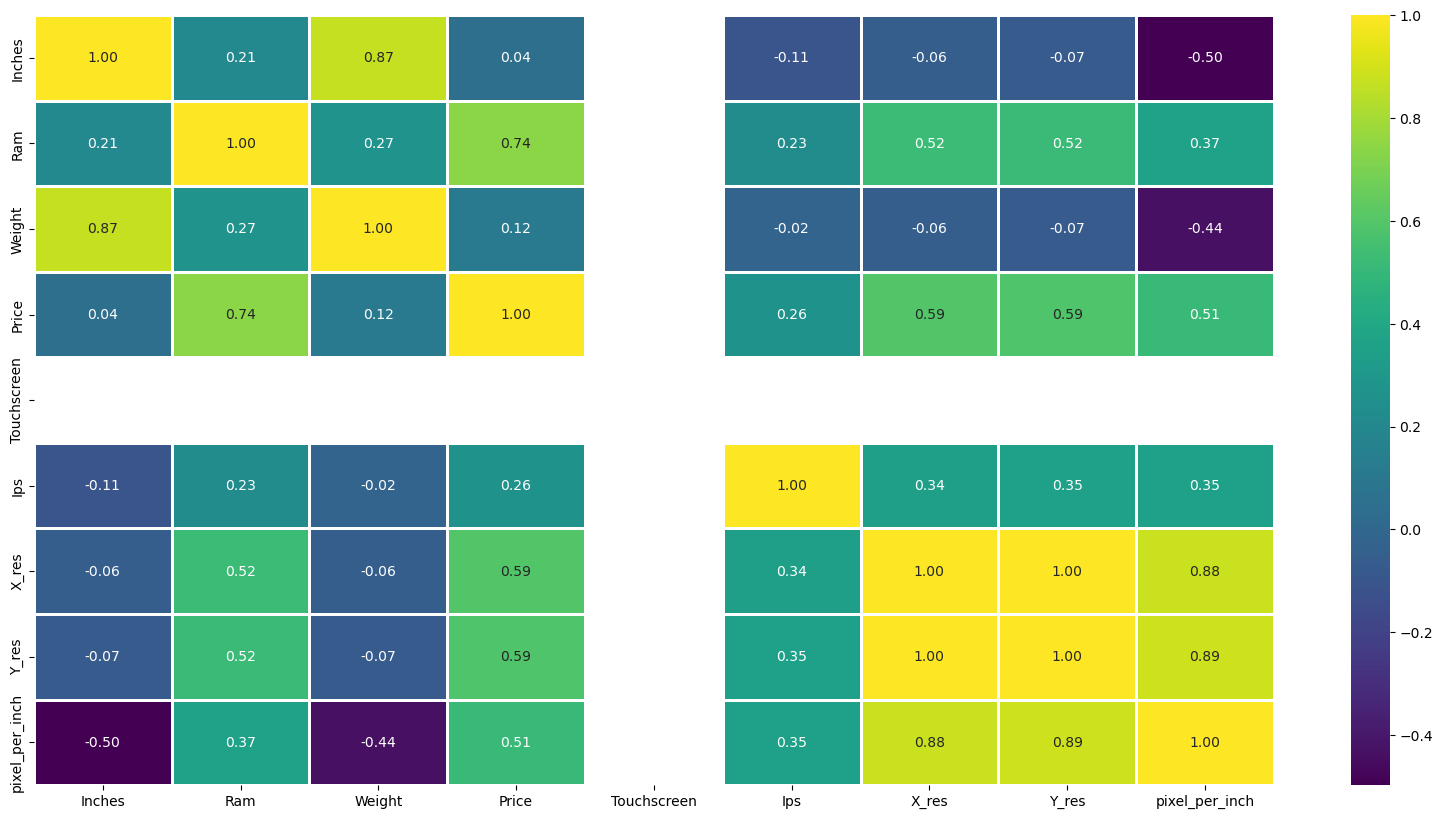

In [220]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), linewidths=1.0, annot=True, fmt=".2f", cmap='viridis')
plt.show

In [221]:
#calculating vif to check the multicollineairty range

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    
    non_numeric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    if non_numeric_cols:
        data = data.select_dtypes(include=np.number)
    if data.isnull().any().any():
        data = data.dropna()
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))


          Feature          VIF
5             Ips     1.642367
3           Price    10.402069
1             Ram    15.629360
2          Weight    49.358059
0          Inches   108.629861
8  pixel_per_inch   281.015628
6           X_res  7830.406661
7           Y_res  7929.124455
4     Touchscreen          NaN


invalid value encountered in double_scalars


In [222]:
df.drop('Y_res',axis=1,inplace=True)

In [223]:
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))

          Feature         VIF
5             Ips    1.638489
3           Price   10.384572
1             Ram   15.629313
2          Weight   49.352112
0          Inches  108.626912
7  pixel_per_inch  271.251306
6           X_res  436.653036
4     Touchscreen         NaN


invalid value encountered in double_scalars


In [224]:
df.drop('X_res',axis=1,inplace=True)

In [225]:
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))

          Feature         VIF
5             Ips    1.636607
3           Price   10.362752
1             Ram   15.239465
6  pixel_per_inch   38.942345
2          Weight   43.033197
0          Inches  101.839302
4     Touchscreen         NaN


invalid value encountered in double_scalars


In [226]:
df.drop('Inches',axis=1,inplace=True)

In [227]:
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))

          Feature        VIF
4             Ips   1.548218
1          Weight   7.794640
2           Price   9.651309
5  pixel_per_inch  10.176492
0             Ram  15.223161
3     Touchscreen        NaN


invalid value encountered in double_scalars


In [228]:
df.drop('Ram',axis=1,inplace=True)

In [229]:
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))

          Feature       VIF
3             Ips  1.545822
1           Price  5.408153
0          Weight  6.413686
4  pixel_per_inch  9.742811
2     Touchscreen       NaN


invalid value encountered in double_scalars


In [230]:
#No values found beyond 10 hence we can proceed further.

# Spliting Data

In [231]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [232]:
X = df_dummies.drop(columns=['Price'])
y = np.log(df_dummies['Price'])

In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

# Feature Selection

In [234]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# rfe = RFECV(estimator=model,cv=5,step=1)
# rfe.fit(X, y)
# selected_features = np.where(rfe.support_)[0]
# print("Selected feature indices:", selected_features.tolist())

In [235]:
# column_names = df_dummies.columns.tolist()
# index_numbers = selected_features 
# selected_columns = [column_names[i] for i in index_numbers]
# print("Selected columns:", selected_columns)

In [236]:
# After doing feature selection performance of models get reduced so we will perform with all the features.

# Statistical Model-OLS

In [237]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
p_values = results.pvalues
selected_features = X_train.columns[p_values <= 0.05]
X_train_filtered = X_train[selected_features]
model_filtered = sm.OLS(y_train, X_train_filtered)
results_filtered = model_filtered.fit()
print(results_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     99.59
Date:                Sun, 25 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:58:08   Log-Likelihood:                 22.496
No. Observations:                1107   AIC:                             77.01
Df Residuals:                    1046   BIC:                             382.6
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [238]:
from sklearn.metrics import mean_squared_error, r2_score
X_test = sm.add_constant(X_test)
X_test_filtered = X_test[selected_features]
y_pred_test = results_filtered.predict(X_test_filtered)
r2_test = r2_score(y_test, y_pred_test)
print("Test Set - R-squared (R2):", r2_test)

Test Set - R-squared (R2): 0.846164795247978


In [239]:
error=y_pred_test-y_test

In [240]:
#Durbin Watson- Value almost close to 2 but there is some presence of autocorrelation.
#Omnibus-Overall data is normall distributed as from the p value we have to acceptnull hypothesis.
#Jarque-Bera-Standout,where h0 is the skewness and kurtosis is behaving normal.
#Skewness-Slightly negatively skewd.
#Kurtosis-Data is concentrated more heavily around the mean.As the pekdness is high.
#Annova-Atleast one pair of group have significant difference in mean laptop price,so f statistics standout. 

<Axes: ylabel='Count'>

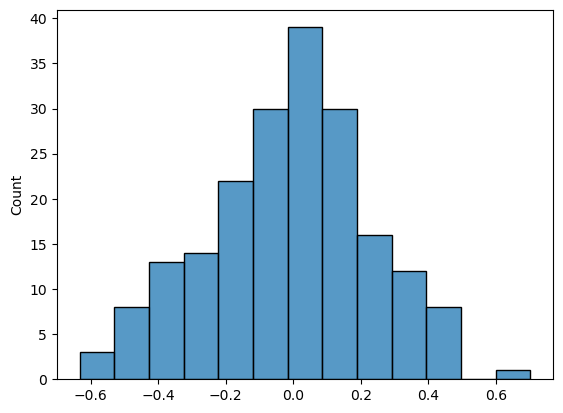

In [241]:
sns.histplot(data=error)

In [242]:
#One of the assumption of ols is satisfied errors are normally distributed

In [243]:
#X_train_filtered

# Random Forest

In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_model = RandomForestRegressor(n_estimators=500,max_depth=15,min_samples_leaf=1,min_samples_split=5)

rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)


mae_train = mean_squared_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - MAE:", mae_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - MAE:",mae_test )
print("Test Set - R-squared (R2):", r2_test)

Train Set - MAE: 0.016360936445291584
Train Set - R-squared (R2): 0.9566458402852807
Test Set - MAE: 0.1670475195556538
Test Set - R-squared (R2): 0.8779799684658743


# Feature Importance

Feature ranking:
1. Feature 139: 0.33926862038835337
2. Feature 138: 0.17955707106860522
3. Feature 1: 0.11891694841916914
4. Feature 4: 0.09532434689528724
5. Feature 25: 0.06560512301256095
6. Feature 140: 0.030353396079071386
7. Feature 27: 0.01465729081268476
8. Feature 141: 0.010109897157857591
9. Feature 3: 0.008254592311963162
10. Feature 73: 0.008181503096383061


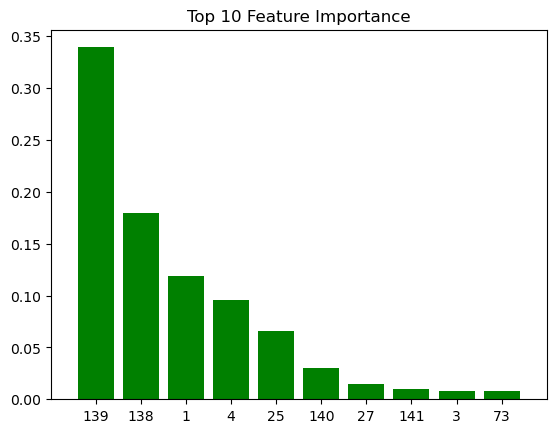

In [245]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]}")
    
import matplotlib.pyplot as plt

plt.figure()
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], color="g", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

In [246]:
column_names = df_dummies.columns.tolist()
index_numbers = [139,138,4,25,140,27,73,141,142]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['Cpu brand_Intel Core i7' 'Cpu brand_Intel Core i5' 'pixel_per_inch'
 'TypeName_Notebook' 'Cpu brand_Other Intel Processor'
 'TypeName_Workstation' 'Gpu_Intel HD Graphics 515'
 'os_Others/No OS/Linux' 'os_Windows']


# Optuna Performing

In [247]:
import optuna
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    regressor = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test=np.sqrt(mse_test)
    return rmse_test
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)

[I 2023-06-25 05:58:13,893] A new study created in memory with name: no-name-26feedad-a19c-4e39-aad4-961f412772be
[I 2023-06-25 05:58:14,965] Trial 0 finished with value: 0.22993630470435872 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.22993630470435872.
[I 2023-06-25 05:58:17,048] Trial 1 finished with value: 0.24021604850981781 and parameters: {'n_estimators': 400, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.22993630470435872.
[I 2023-06-25 05:58:21,865] Trial 2 finished with value: 0.22031206631562733 and parameters: {'n_estimators': 800, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.22031206631562733.
[I 2023-06-25 05:58:26,599] Trial 3 finished with value: 0.23936015151581455 and parameters: {'n_estimators': 1000, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 2 wit

Best Parameters:  {'n_estimators': 200, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 1}
Best Value:  0.2181919711876539


In [248]:
#!pip install shap

# Explanaible AI Framework

In [307]:
import shap
explainer = shap.Explainer(rf_model)
shap_values1 = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


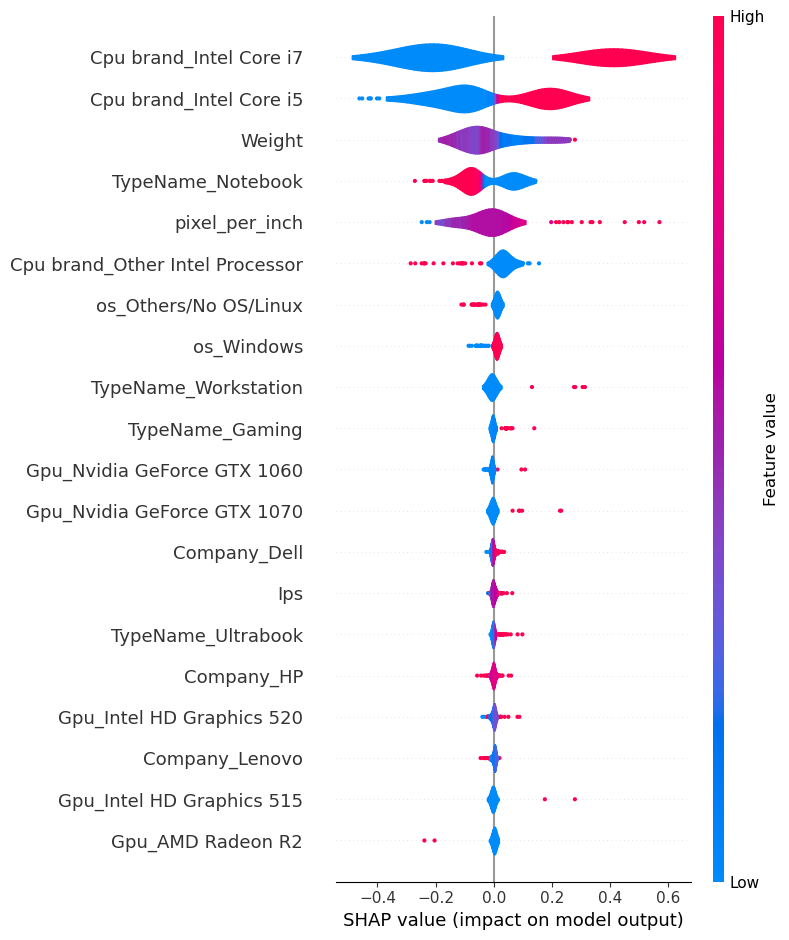

In [326]:
shap.summary_plot(shap_values1, X_test,plot_type='violin')

#Higher the cpu brand value higher will be the laptop price,also from beeswarm chart we can see that the higher pixel per inch 
#increase the laptop value.While the other brands of cpu intel brans negatively impact on laptop price,people love to pay only for i5 or i7.

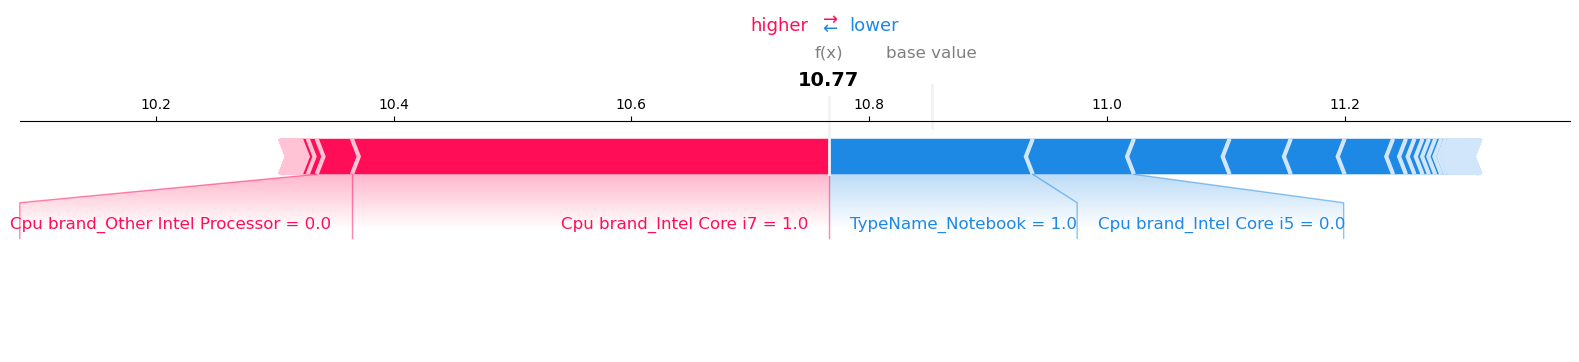

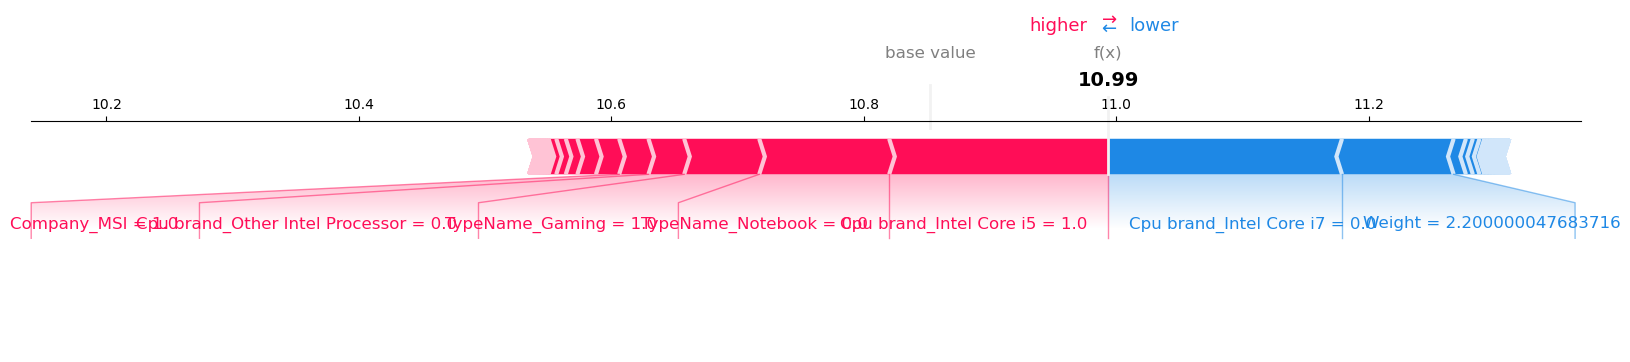

In [375]:
instance_index = [15, 89]
for i in instance_index:
    base_value = explainer.expected_value
    shap_values_instance = shap_values1[i]
    shap.force_plot(base_value, shap_values_instance, X_test.iloc[i], matplotlib=True)

In [330]:
#For one instances we can see from the force plot cpu brand i7,cpu brand intel processor has the higher impact on predicting the laptop price.
#TypeName_Notebook,weight lower effect on predicting price

# Decision Tree

In [251]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

DTR_model = DecisionTreeRegressor(max_depth=12,min_samples_leaf=2,min_samples_split=15)

DTR_model.fit(X_train, y_train)

y_pred_train = DTR_model.predict(X_train)
y_pred_test = DTR_model.predict(X_test)


mae_train = mean_squared_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - MAE:", mae_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - MAE:",mae_test )
print("Test Set - R-squared (R2):", r2_test)


Train Set - MAE: 0.03285434078644059
Train Set - R-squared (R2): 0.912940659445745
Test Set - MAE: 0.18818001718658725
Test Set - R-squared (R2): 0.8446576612913256


In [252]:
import optuna
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 5, 18)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    regressor = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test=np.sqrt(mse_test)
    return rmse_test
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)

[I 2023-06-25 05:59:16,803] A new study created in memory with name: no-name-896e8e30-8f5c-410b-92c4-1bbf87a60afe
[I 2023-06-25 05:59:16,822] Trial 0 finished with value: 0.263268014051021 and parameters: {'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.263268014051021.
[I 2023-06-25 05:59:16,839] Trial 1 finished with value: 0.2608346240235163 and parameters: {'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.2608346240235163.
[I 2023-06-25 05:59:16,855] Trial 2 finished with value: 0.2847779218257459 and parameters: {'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.2608346240235163.
[I 2023-06-25 05:59:16,869] Trial 3 finished with value: 0.2772783276075703 and parameters: {'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.2608346240235163.
[I 2023-06-25 05:59:16,883] Trial 4 finished with value: 0.27663

Best Parameters:  {'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 2}
Best Value:  0.23728817219001047


Feature ranking:
1. Feature 139: 0.3624059287391125
2. Feature 138: 0.1889772154545417
3. Feature 1: 0.10549503193250398
4. Feature 4: 0.08712991781978824
5. Feature 25: 0.04943164980395585
6. Feature 140: 0.02522614758674925
7. Feature 27: 0.022778962174055662
8. Feature 142: 0.01852222019283522
9. Feature 64: 0.01130553631638643
10. Feature 106: 0.009757747486073323


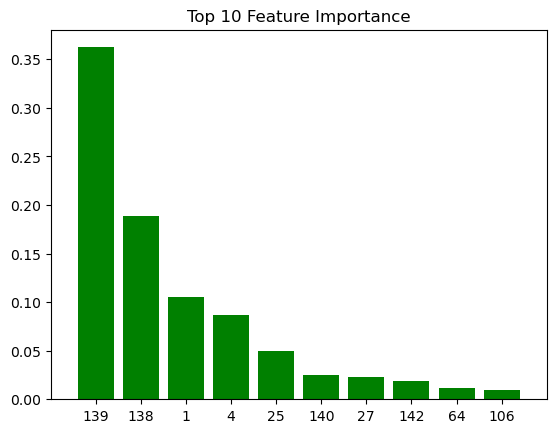

In [253]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]}")
    
import matplotlib.pyplot as plt

plt.figure()
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], color="g", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

In [254]:
column_names = df_dummies.columns.tolist()
index_numbers = [139,138,4,25,140,27,141,64,106]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['Cpu brand_Intel Core i7' 'Cpu brand_Intel Core i5' 'pixel_per_inch'
 'TypeName_Notebook' 'Cpu brand_Other Intel Processor'
 'TypeName_Workstation' 'os_Others/No OS/Linux' 'Gpu_AMD Radeon RX 580'
 'Gpu_Nvidia GeForce GTX 1060']


# KNN

In [255]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

mae_train = mean_squared_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - MAE:", mae_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - MAE:",mae_test )
print("Test Set - R-squared (R2):", r2_test)

Train Set - MAE: 0.03196787628437934
Train Set - R-squared (R2): 0.9152896645734345
Test Set - MAE: 0.18878307083103144
Test Set - R-squared (R2): 0.8253795652141839


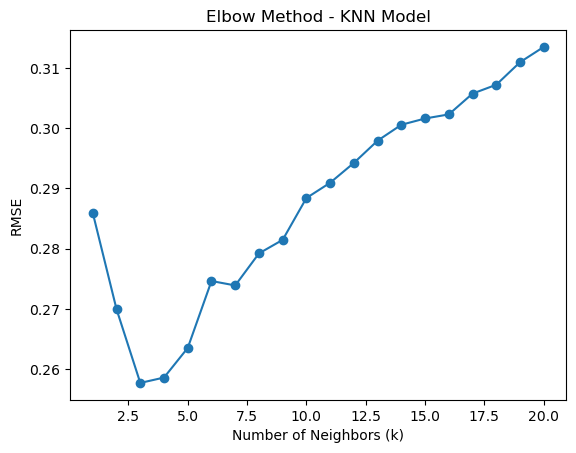

In [256]:
k_values = []
rmse_values = []
for k in range(1, 21):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    k_values.append(k)
    rmse_values.append(rmse)
# Plot the RMSE values against the number of neighbors (k)
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('Elbow Method - KNN Model')
plt.show()

In [257]:
# Ideal k from the graph we can see that 3,where drastically decreased after that RMSE increased

# Adaboost

In [258]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
import math 

Ada_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.029792329343184265, loss='exponential')

Ada_model.fit(X_train, y_train)

y_pred_train = Ada_model.predict(X_train)
y_pred_test = Ada_model.predict(X_test)

mae_train = mean_squared_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - MAE:", mae_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - MAE:", mae_test)
print("Test Set - R-squared (R2):", r2_test)


Train Set - MAE: 0.0968995291814825
Train Set - R-squared (R2): 0.7432299991835689
Test Set - MAE: 0.26240043926445894
Test Set - R-squared (R2): 0.7390420216284255


In [259]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.2)
    loss = trial.suggest_categorical('loss', ['linear', 'square', 'exponential'])
    
    regressor = AdaBoostRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        loss=loss,
        random_state=42
    )
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)


[I 2023-06-25 05:59:22,175] A new study created in memory with name: no-name-a803ef0c-6606-4090-a6b1-0bf9868021db
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-06-25 05:59:25,273] Trial 0 finished with value: 0.09945241406625663 and parameters: {'n_estimators': 600, 'learning_rate': 0.015223850407245852, 'loss': 'linear'}. Best is trial 0 with value: 0.09945241406625663.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-06-25 05:59:29,631] Trial 1 finished with value: 0.11763549478858823 and parameters: {'n_estimators': 800, 'learning_rate': 0.12690974803985458, 'loss': 'exponential'}. Best is trial 0 with value: 0.09945241406625663.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

Best Parameters:  {'n_estimators': 700, 'learning_rate': 0.011286006740599038, 'loss': 'linear'}
Best Value:  0.09775009223345534


In [260]:
X_test.columns

Index(['const', 'Weight', 'Touchscreen', 'Ips', 'pixel_per_inch',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu',
       ...
       'Gpu_Nvidia Quadro M500M', 'Gpu_Nvidia Quadro M520M',
       'Gpu_Nvidia Quadro M620', 'Gpu_Nvidia Quadro M620M',
       'Cpu brand_Intel Core i3', 'Cpu brand_Intel Core i5',
       'Cpu brand_Intel Core i7', 'Cpu brand_Other Intel Processor',
       'os_Others/No OS/Linux', 'os_Windows'],
      dtype='object', length=143)

In [261]:
# Select a random subset of 50 samples from X_test
random_indices = np.random.choice(X_test.shape[0], 100, replace=False)
X_test_subset = X_test.iloc[random_indices]

feature_names = X_test.columns

random_train_indices = np.random.choice(X_train.shape[0], 200, replace=False)
X_train_subset = X_train.iloc[random_train_indices]
background = shap.sample(X_train_subset, 100)

explainer = shap.KernelExplainer(Ada_model.predict, background)
explainer.feature_names = feature_names

shap_values = explainer.shap_values(X_test_subset)

X does not have valid feature names, but AdaBoostRegressor was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
X does not have valid

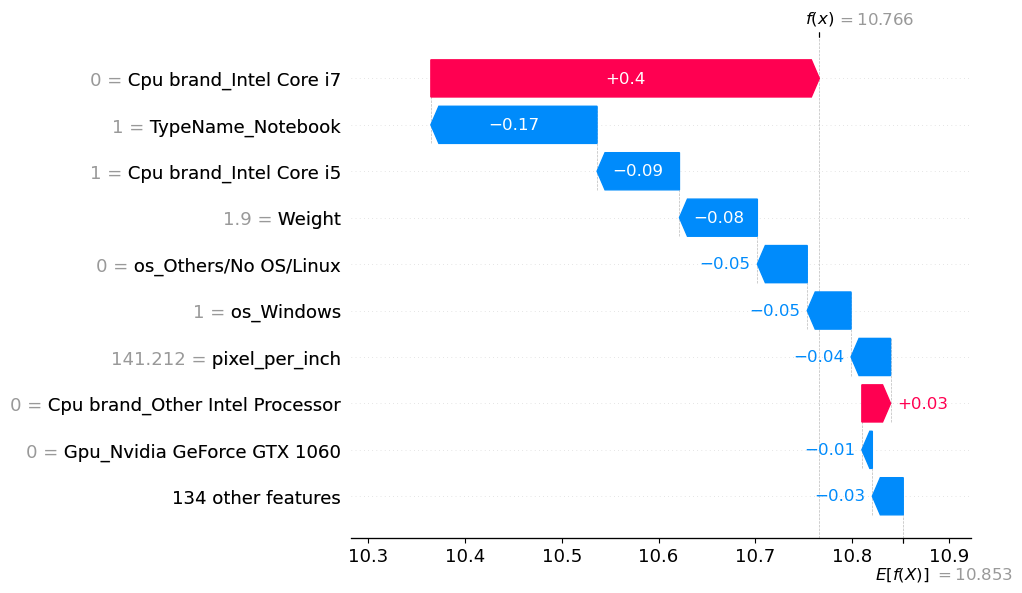

In [376]:
instance_index = 15
feature_names = X_test.columns

shap.initjs()
shap.waterfall_plot(shap.Explanation(values=shap_values[instance_index], 
                                     base_values=explainer.expected_value,
                                     data=X_test_subset.iloc[instance_index],
                                     feature_names=feature_names))
plt.show()

In [374]:
#Same result we can see from the Adaboost model.Mainly intel i7 contribute more towards predicting laptop price

# Conclusion

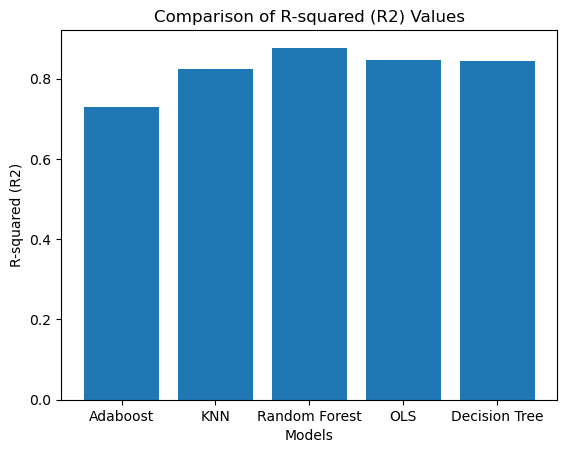

In [265]:
import matplotlib.pyplot as plt
models = ['Adaboost', 'KNN', 'Random Forest', 'OLS','Decision Tree']
r2_values = [0.730, 0.825, 0.877, 0.846,0.844]
plt.bar(models, r2_values)
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) Values')
plt.show()